<a href="https://colab.research.google.com/github/jacquesescp/DSforAM_group10/blob/main/Homework_simplified_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
GOOG.isnull().sum()

Ticker  Price 
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [ ]:
#Combining dataframes
dataset = pd.concat([GOOG['GOOG'].Close, AAPL['AAPL'].Close,META['META'].Close,AMZN['AMZN'].Close, MSFT['MSFT'].Close,GSPC['^GSPC'].Close],axis=1)
# Change the column names
dataset.columns =['GOOG', 'AAPL', 'META','AMZN','MSFT','GSPC']
dataset.head()

,GOOG,AAPL,META,AMZN,MSFT,GSPC
Date,,,,,,
2012-05-18,14.852310,15.922072,37.995766,10.6925,23.269142,1295.219971
2012-05-21,15.191459,16.849689,33.821495,10.9055,23.650734,1315.989990
2012-05-22,14.862205,16.720303,30.810062,10.7665,23.658688,1316.630005
2012-05-23,15.076430,17.128279,31.803938,10.8640,23.141954,1318.859985
2012-05-24,14.932956,16.970972,32.827625,10.7620,23.110138,1320.680054


In [ ]:
print('Shape of data',dataset.shape)

Shape of data (2673, 6)


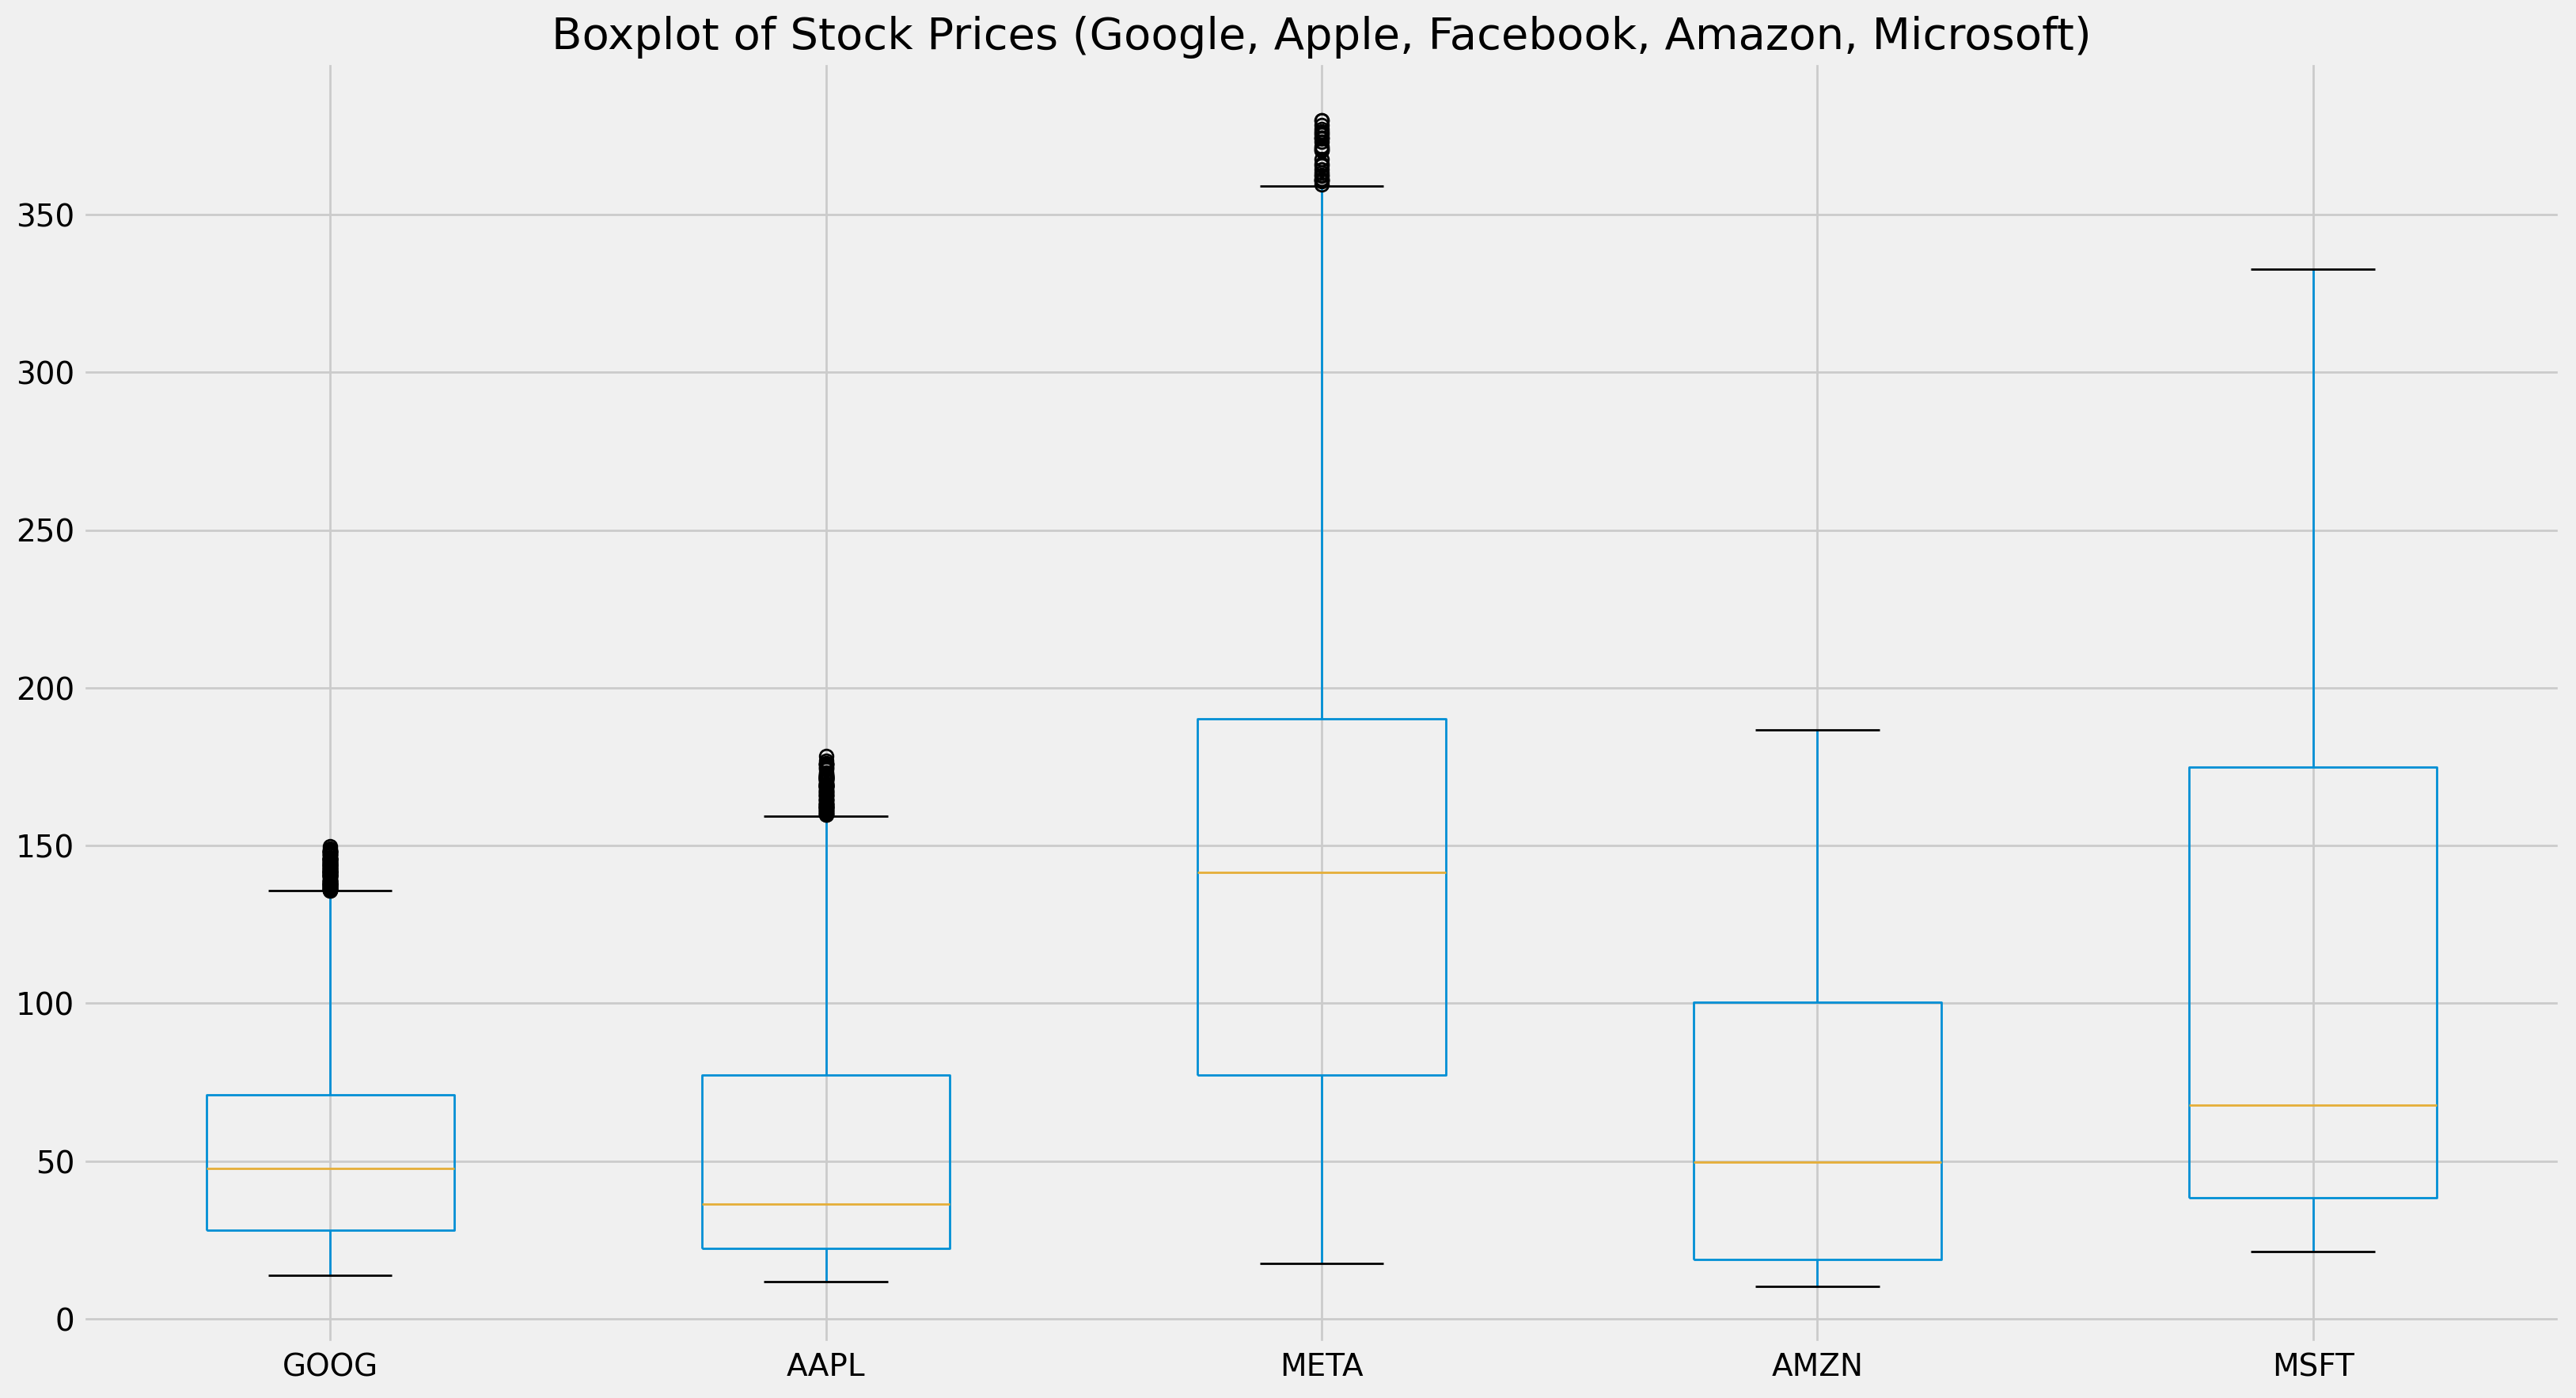

In [ ]:
plt.style.use("fivethirtyeight")
dataset[['GOOG','AAPL','META','AMZN','MSFT']].boxplot()
plt.title("Boxplot of Stock Prices (Google, Apple, Facebook, Amazon, Microsoft)")
plt.show()

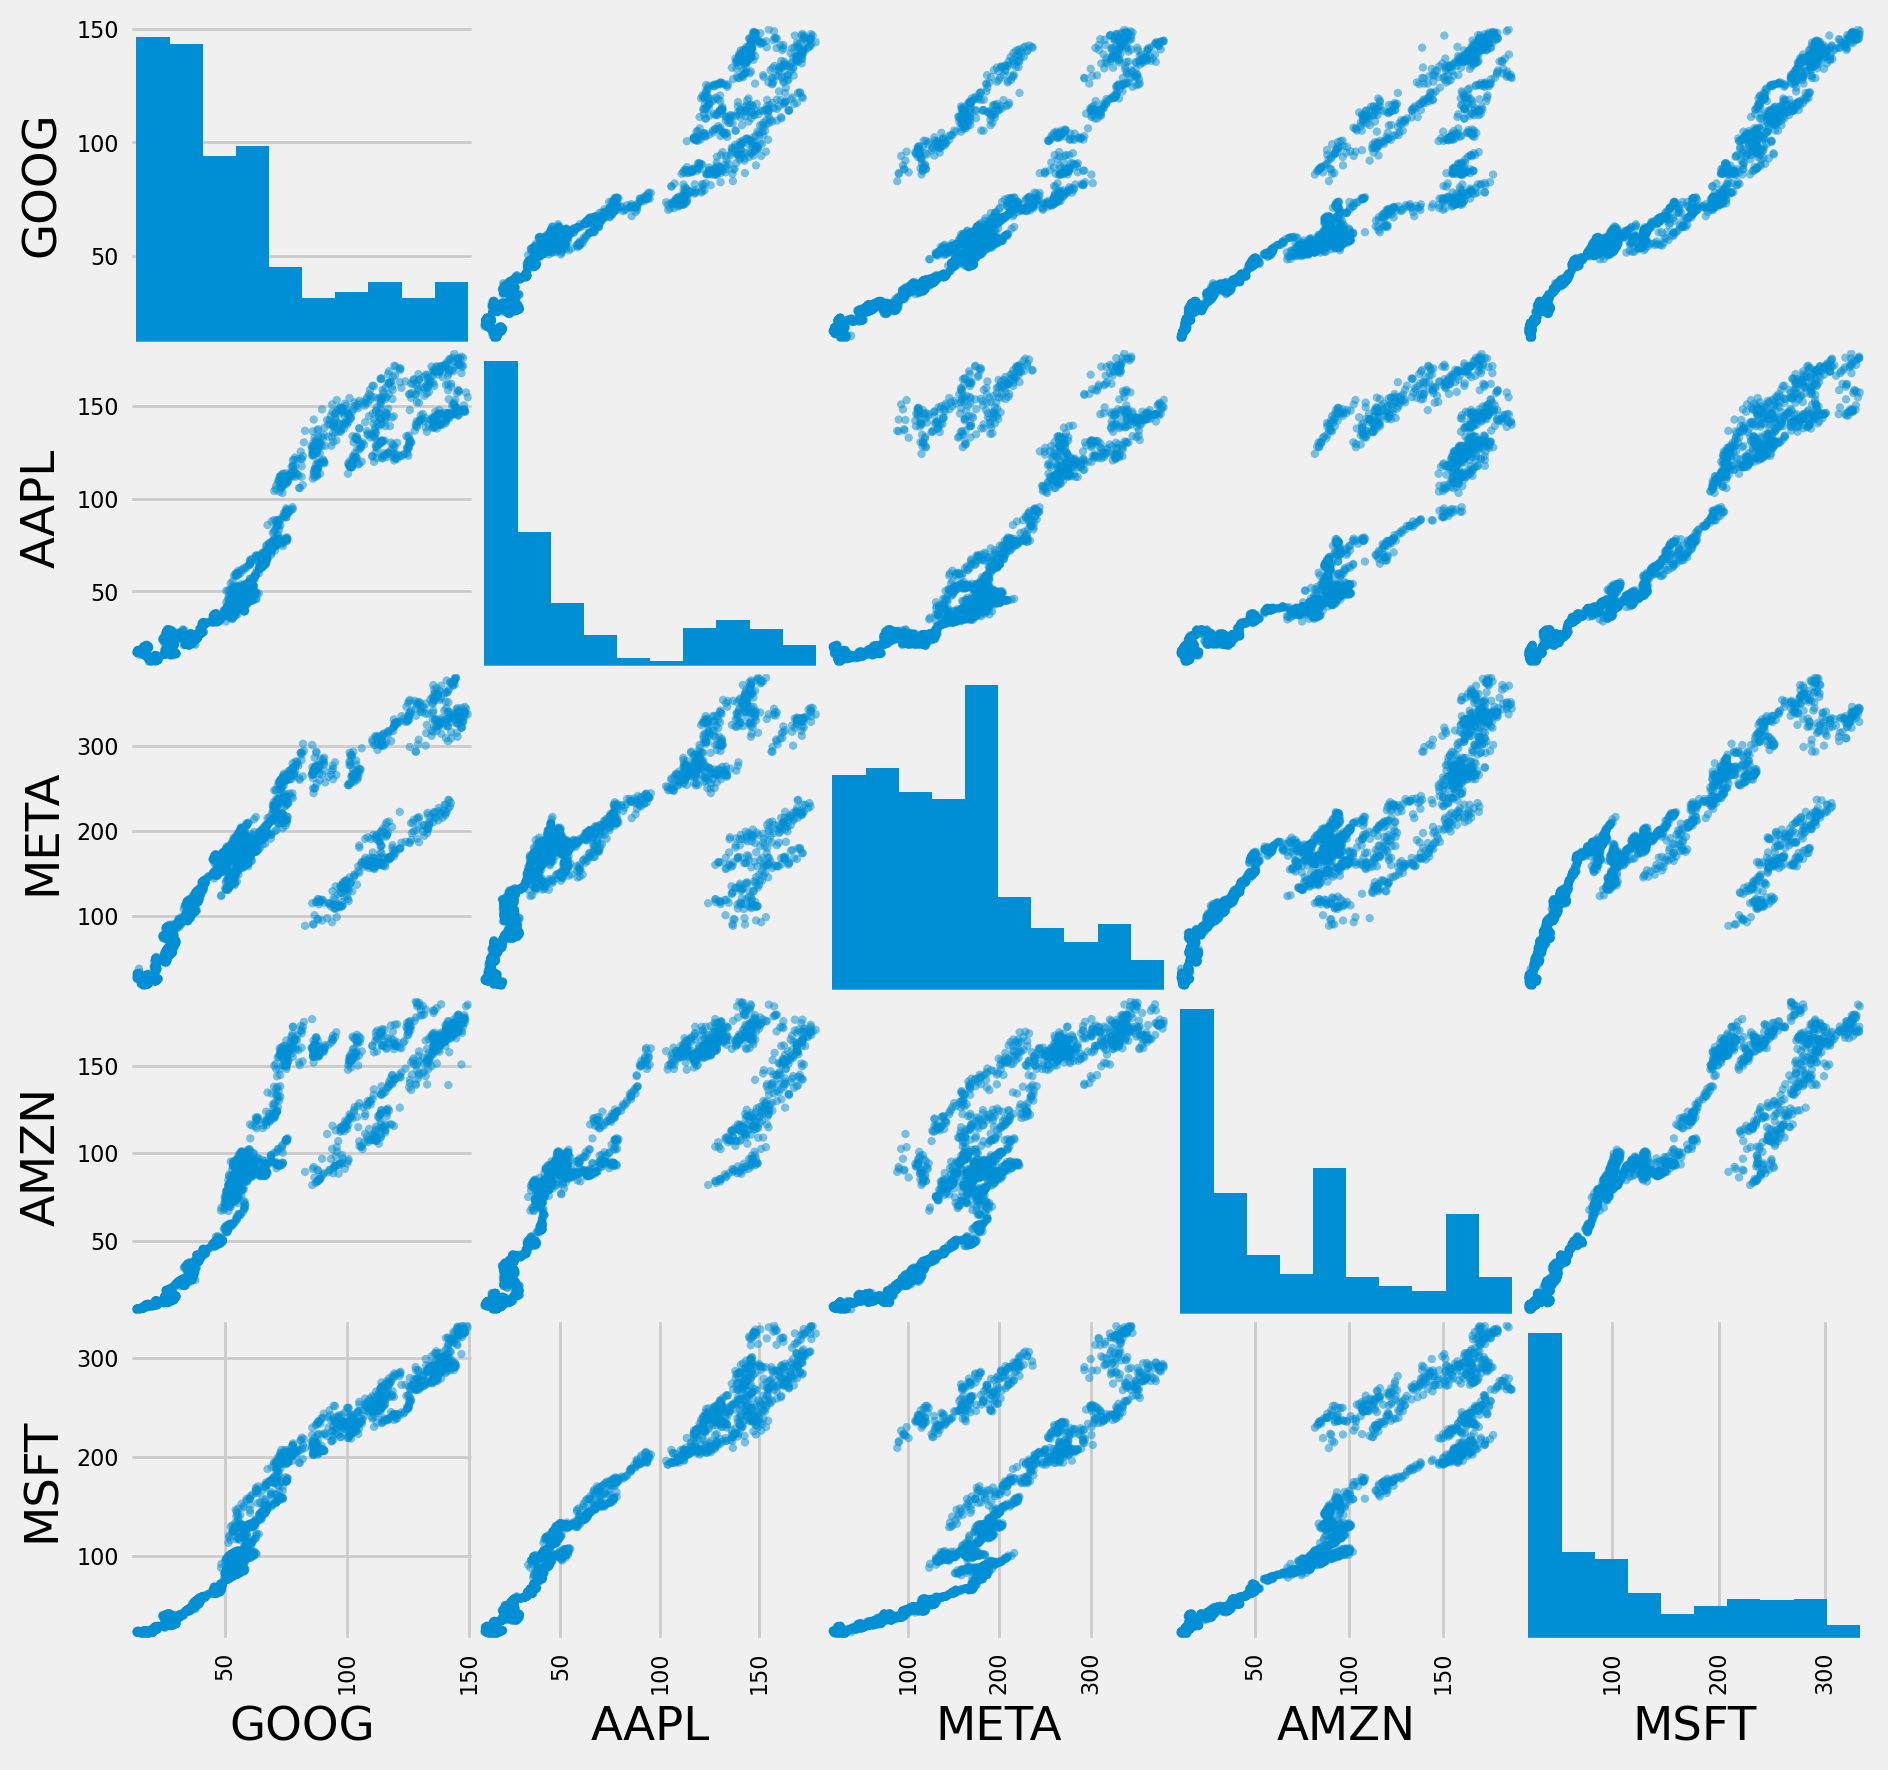

In [ ]:
#dataset.hist(figsize=(10,10))
pd.plotting.scatter_matrix(dataset[['GOOG','AAPL','META','AMZN','MSFT']], figsize=(10,10))
plt.show()

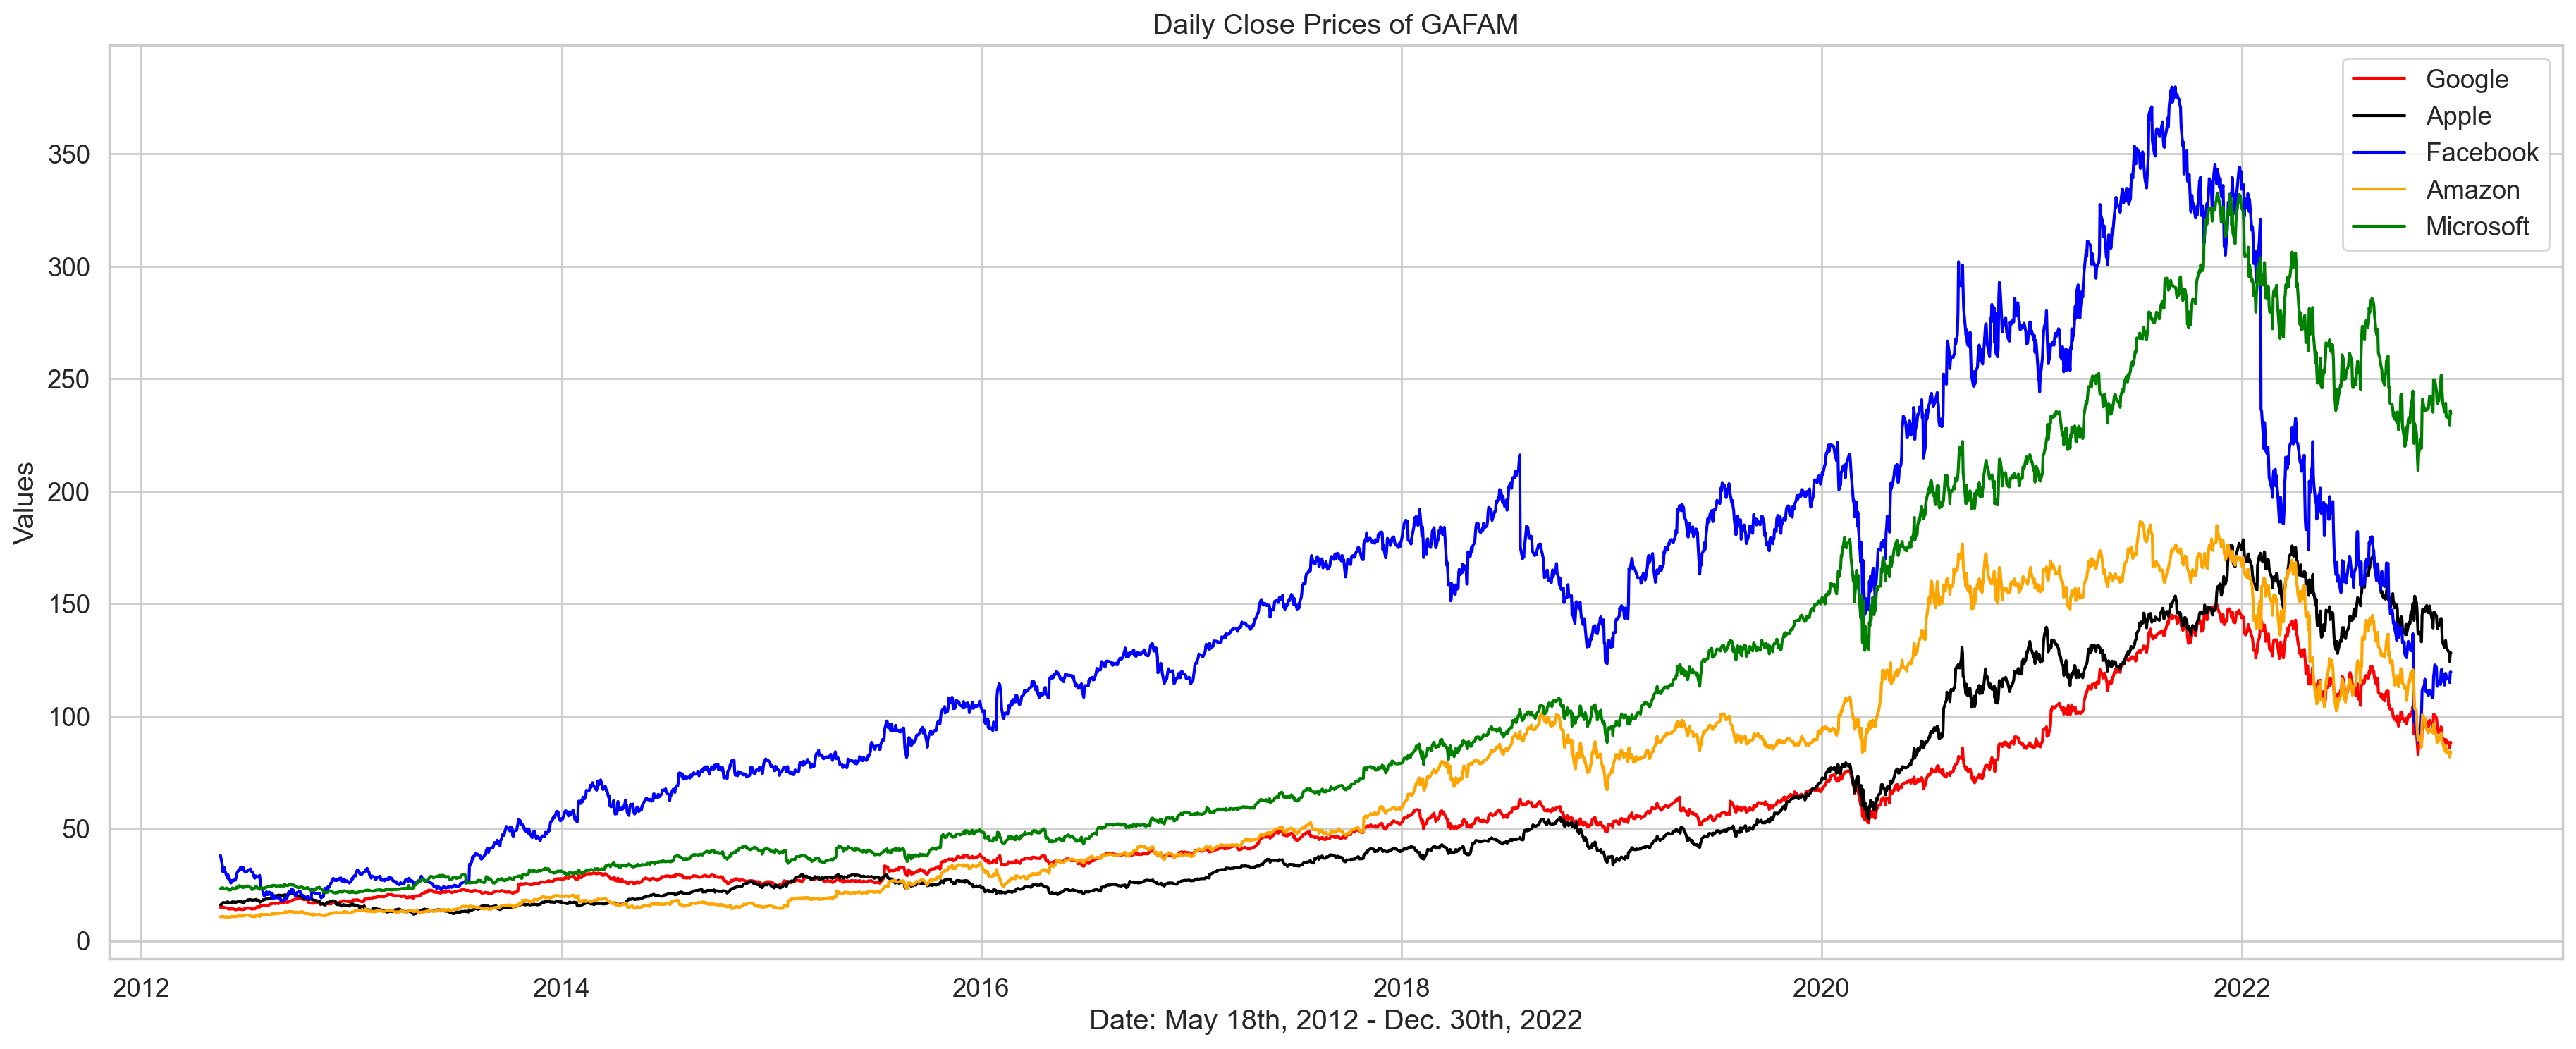

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of GAFAM')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2022')
plt.ylabel('Values')
plt.plot(dataset['GOOG'], 'red', label='Google')
plt.plot(dataset['AAPL'], 'black', label='Apple')
plt.plot(dataset['META'], 'blue', label='Facebook')
plt.plot(dataset['AMZN'], 'orange', label='Amazon')
plt.plot(dataset['MSFT'], 'green', label='Microsoft')
plt.legend()
plt.show()

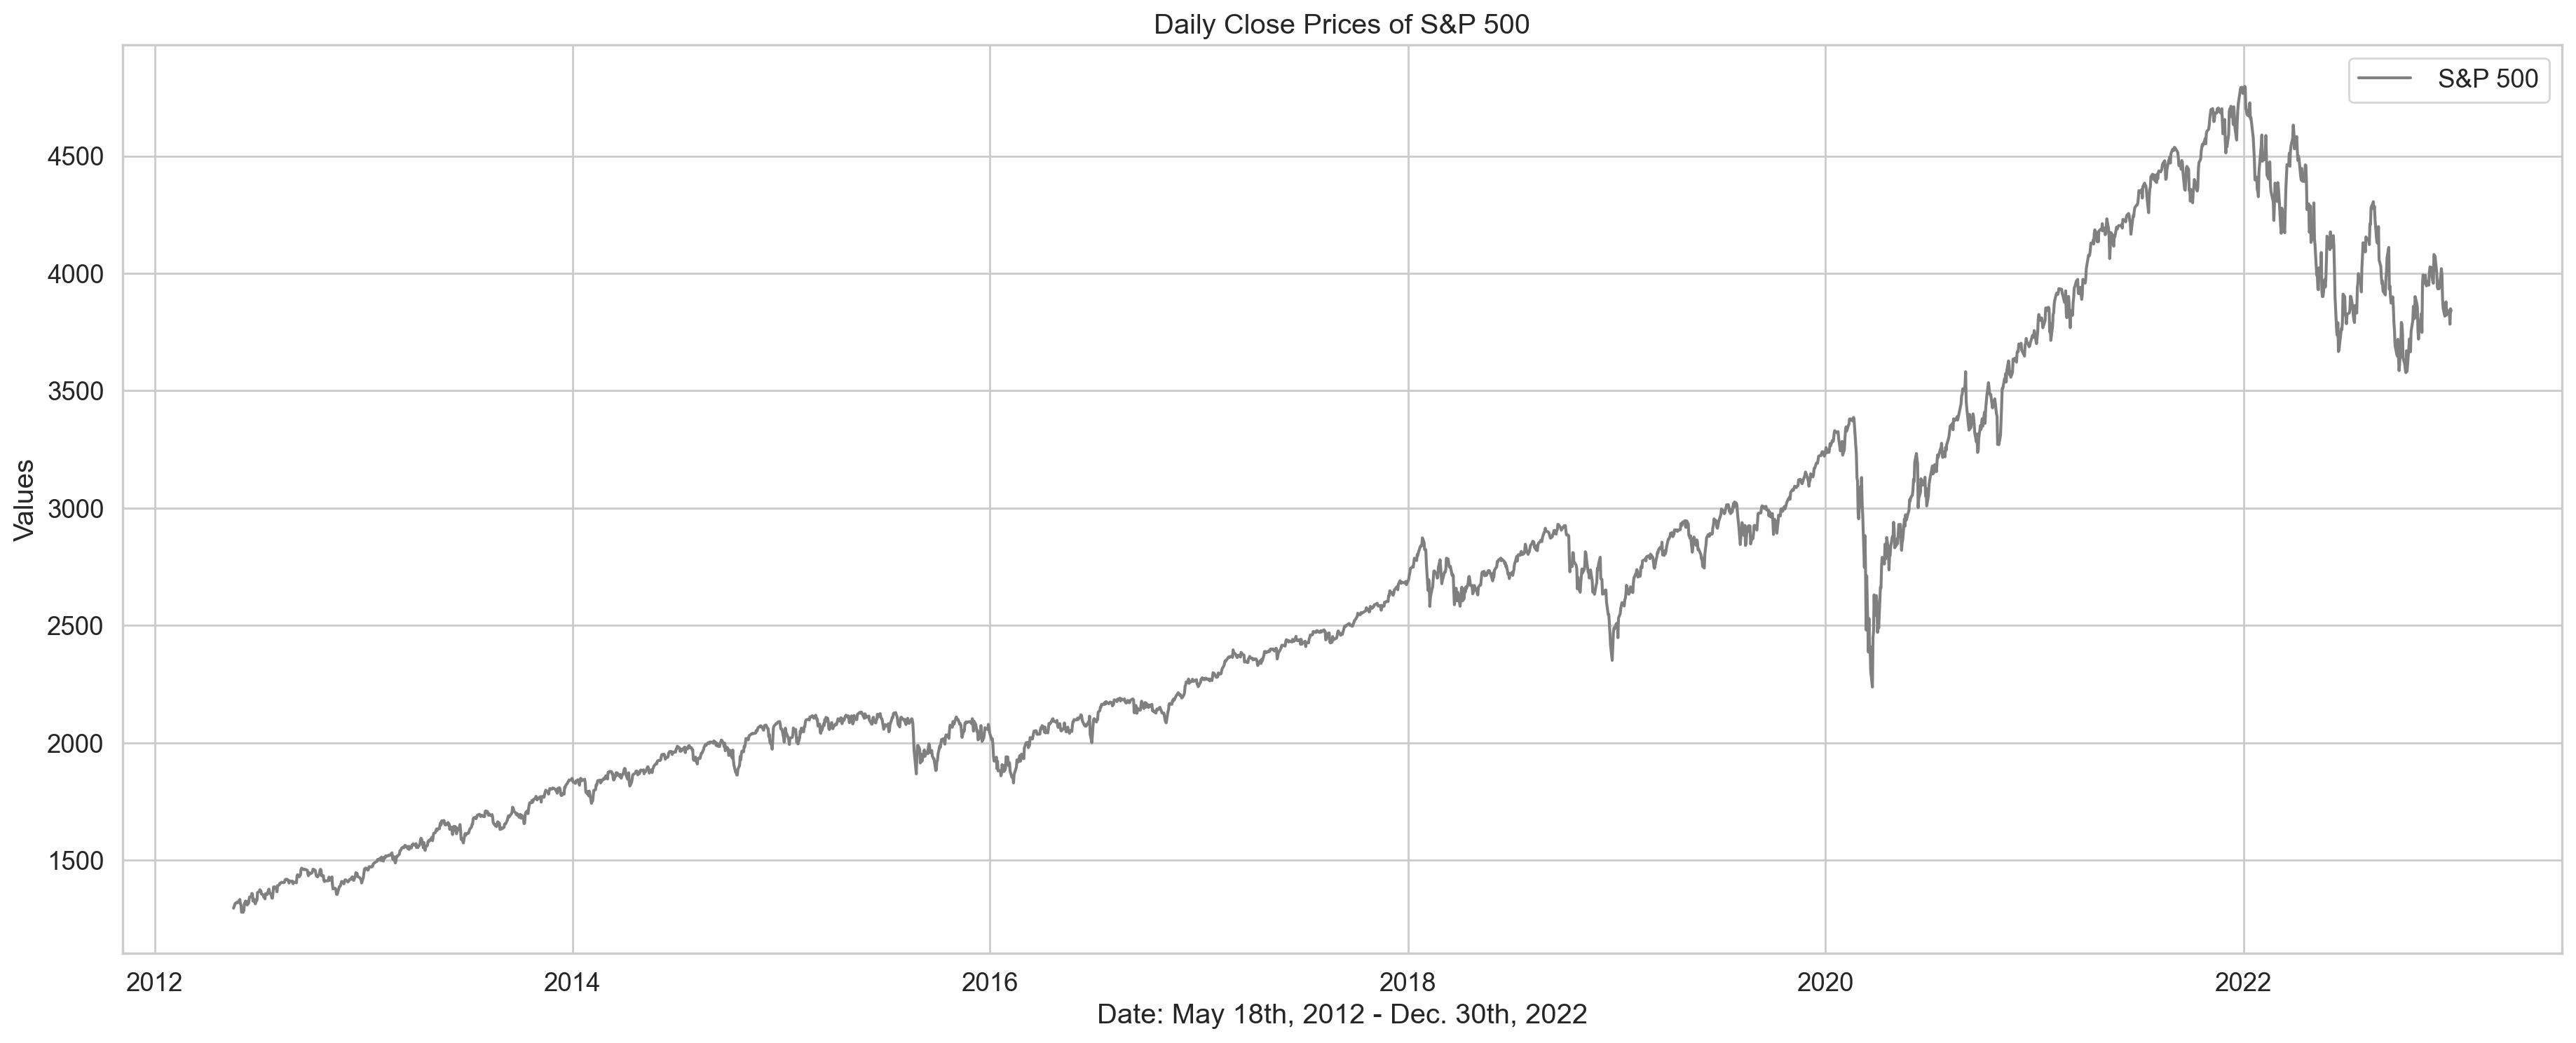

In [ ]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of S&P 500')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2022')
plt.ylabel('Values')
plt.plot(dataset['GSPC'], 'grey', label=' S&P 500')
plt.legend()
plt.show()

In [ ]:
#Create a new columns Return in the dataset for each company's
dataset['R_GOOG'] = dataset[['GOOG']].pct_change(1)
dataset['R_AAPL'] = dataset[['AAPL']].pct_change(1)
dataset['R_META'] = dataset[['META']].pct_change(1)
dataset['R_AMZN'] = dataset[['AMZN']].pct_change(1)
dataset['R_MSFT'] = dataset[['MSFT']].pct_change(1)
dataset['R_GSPC'] = dataset[['GSPC']].pct_change(1)
dataset.head

<bound method NDFrame.head of                  GOOG        AAPL        META       AMZN        MSFT  \
Date                                                                   
2012-05-18  14.852310   15.922072   37.995766  10.692500   23.269142   
2012-05-21  15.191459   16.849689   33.821495  10.905500   23.650734   
2012-05-22  14.862205   16.720303   30.810062  10.766500   23.658688   
2012-05-23  15.076430   17.128279   31.803938  10.864000   23.141954   
2012-05-24  14.932956   16.970972   32.827625  10.762000   23.110138   
...               ...         ...         ...        ...         ...   
2022-12-23  89.199585  130.026230  117.316780  85.250000  233.591873   
2022-12-27  87.332352  128.221680  116.163879  83.040001  231.859970   
2022-12-28  85.872353  124.287163  114.911598  81.820000  229.482269   
2022-12-29  88.345428  127.807510  119.523170  84.180000  235.822784   
2022-12-30  88.126938  128.123047  119.602676  84.000000  234.658417   

                   GSPC    R_GOOG

In [ ]:
dataset.describe()

,GOOG,AAPL,META,AMZN,MSFT,GSPC,R_GOOG,R_AAPL,R_META,R_AMZN,R_MSFT,R_GSPC
count,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000
mean,56.441728,57.378431,147.085174,70.188333,109.488406,2664.394164,0.000809,0.000948,0.000751,0.000978,0.001007,0.000467
std,35.336733,48.130683,86.466090,53.709630,88.907810,904.069600,0.016898,0.018302,0.025274,0.020336,0.016839,0.010953
min,13.829420,11.896804,17.621368,10.411000,21.275980,1278.040039,-0.111008,-0.128647,-0.263901,-0.140494,-0.147391,-0.119841
25%,28.049213,22.315800,77.353134,18.938499,38.323112,1989.569946,-0.006764,-0.007586,-0.010112,-0.008609,-0.006684,-0.003640
50%,47.629562,36.421207,141.408264,49.758499,67.827988,2473.449951,0.000688,0.000752,0.000870,0.000916,0.000698,0.000594
75%,71.104416,77.225594,190.117966,100.495003,174.926895,3197.520020,0.008903,0.010504,0.012629,0.011109,0.009284,0.005426
max,149.684662,178.443130,379.838348,186.570496,332.608704,4796.560059,0.160524,0.119808,0.296115,0.141311,0.142169,0.093828


In [ ]:
# Daily volatility (in %) of each stock
dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].std()

R_GOOG    0.016898
R_AAPL    0.018302
R_META    0.025274
R_AMZN    0.020336
R_MSFT    0.016839
R_GSPC    0.010953
dtype: float64

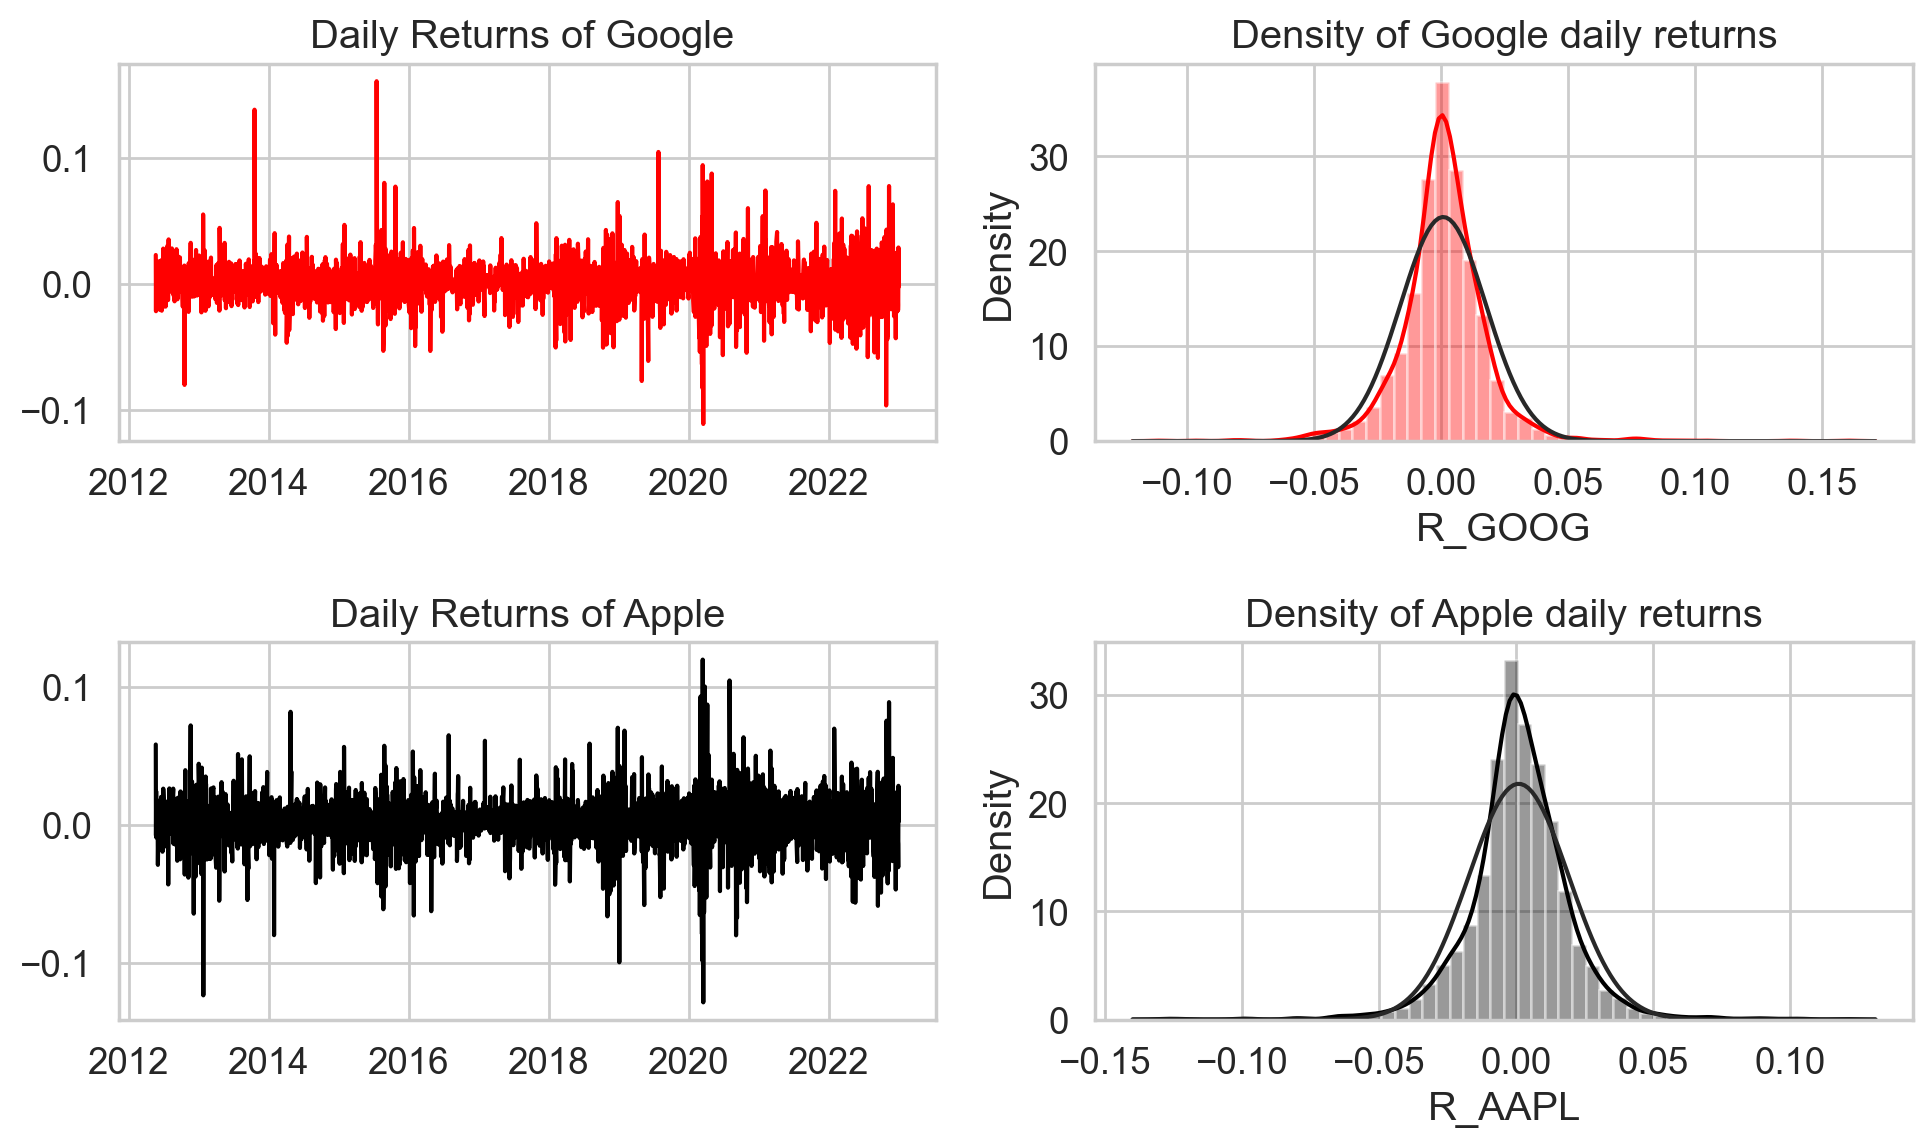

In [ ]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
    axes[0][0].plot(dataset['R_GOOG'], color='red')
    axes[0][0].set_title('Daily Returns of Google ')
    sns.distplot(dataset['R_GOOG'], norm_hist=True, fit=stats.norm, color='red',
    bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Google daily returns')
    axes[1][0].plot(dataset['R_AAPL'], color='black')
    axes[1][0].set_title('Daily Returns of Apple')
    sns.distplot(dataset['R_AAPL'], norm_hist=True, fit=stats.norm, color='black',
    bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of Apple daily returns')
    plt.tight_layout()
    #fig.show()
    plt.show()

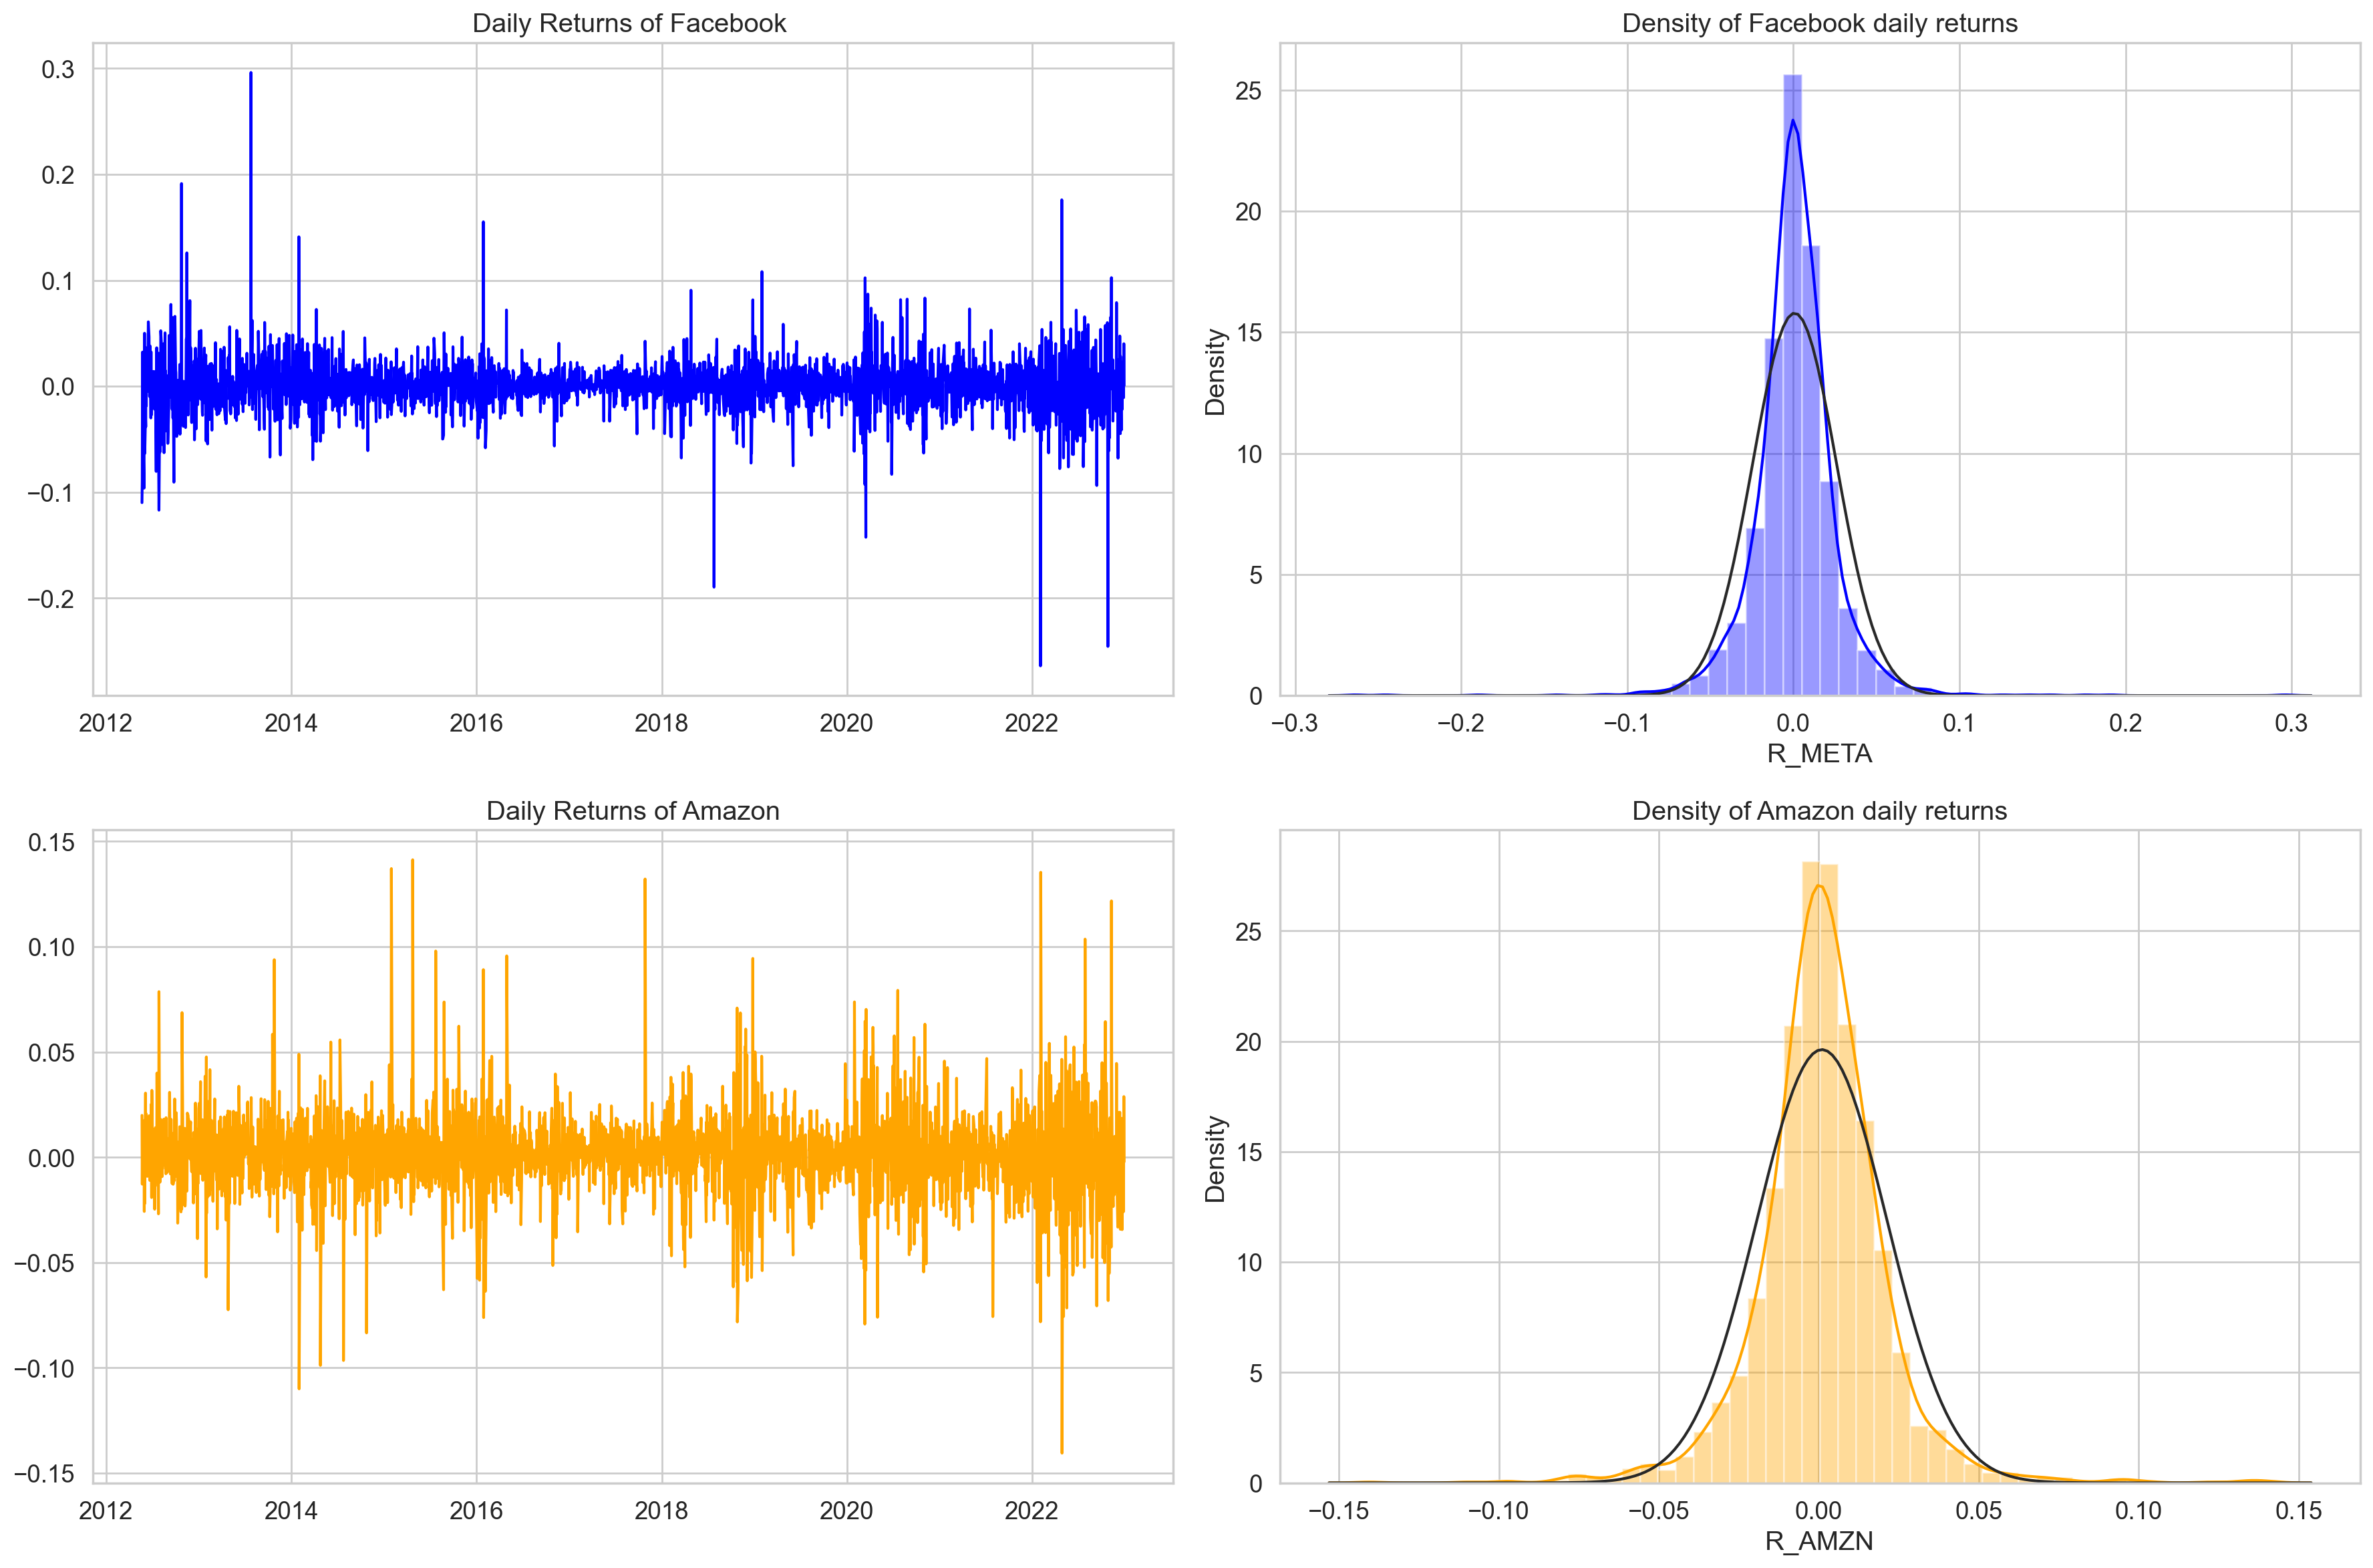

In [ ]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
    axes[0][0].plot(dataset['R_META'], color='blue')
    axes[0][0].set_title('Daily Returns of Facebook ')
    sns.distplot(dataset['R_META'], norm_hist=True, fit=stats.norm, color='blue',
    bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Facebook daily returns')
    axes[1][0].plot(dataset['R_AMZN'], color='orange')
    axes[1][0].set_title('Daily Returns of Amazon')
    sns.distplot(dataset['R_AMZN'], norm_hist=True, fit=stats.norm, color='orange',
    bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of Amazon daily returns')
    plt.tight_layout()
    #fig.show();
    plt.show()

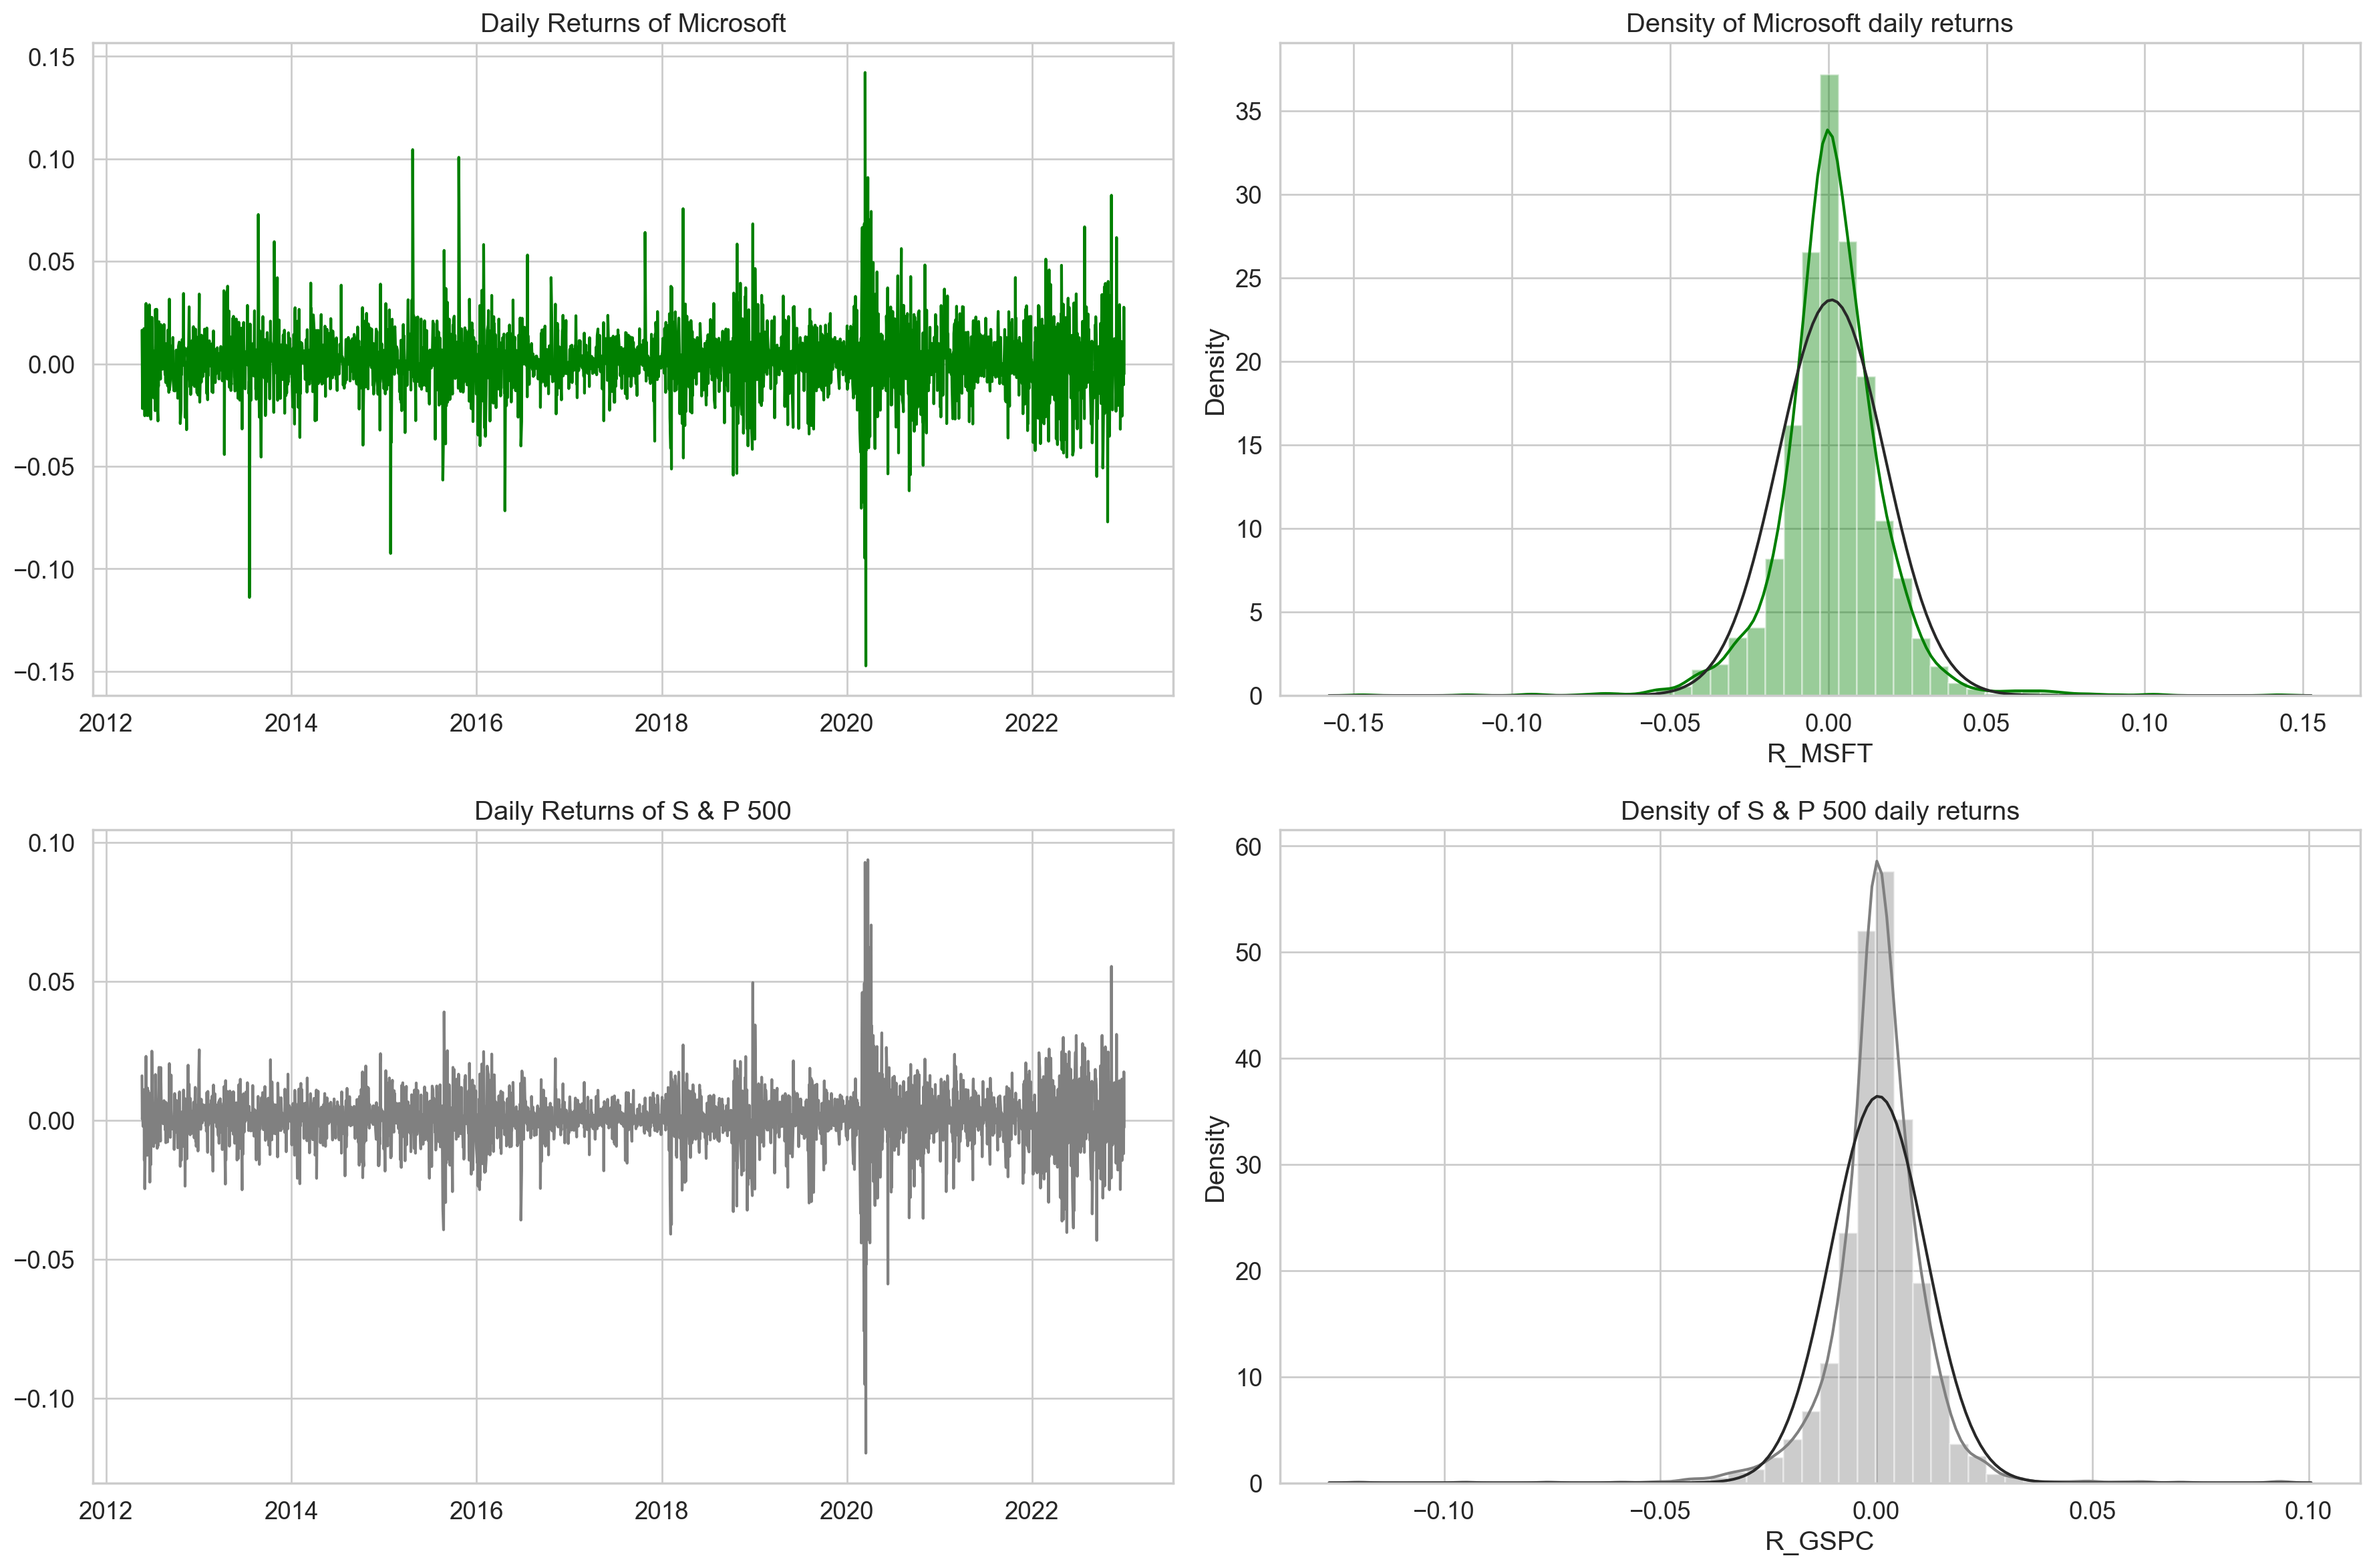

In [ ]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
    axes[0][0].plot(dataset['R_MSFT'], color='green')
    axes[0][0].set_title('Daily Returns of Microsoft')
    sns.distplot(dataset['R_MSFT'], norm_hist=True, fit=stats.norm, color='green',
    bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Microsoft daily returns')
    axes[1][0].plot(dataset['R_GSPC'], color='grey')
    axes[1][0].set_title('Daily Returns of S & P 500')
    sns.distplot(dataset['R_GSPC'], norm_hist=True, fit=stats.norm, color='grey',
    bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of S & P 500 daily returns')
    plt.tight_layout()
    #fig.show();
    plt.show()
    fig.savefig('test1')

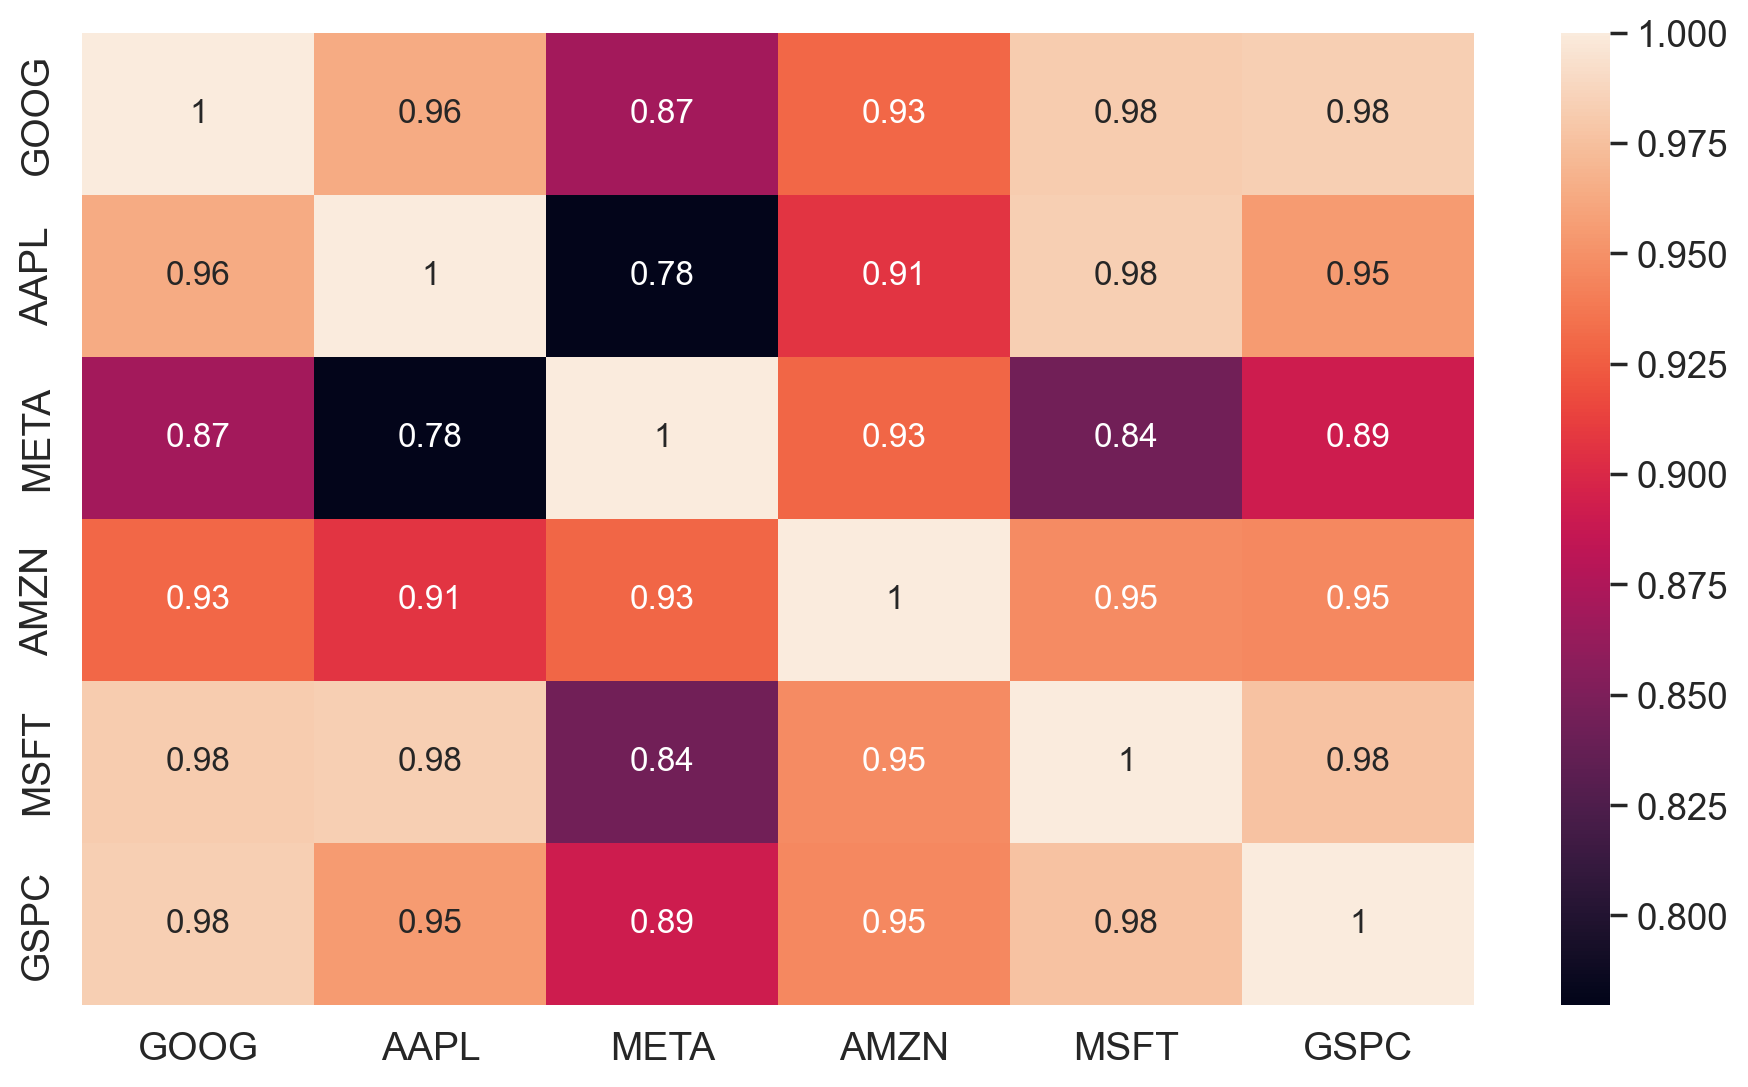

In [ ]:
corr = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

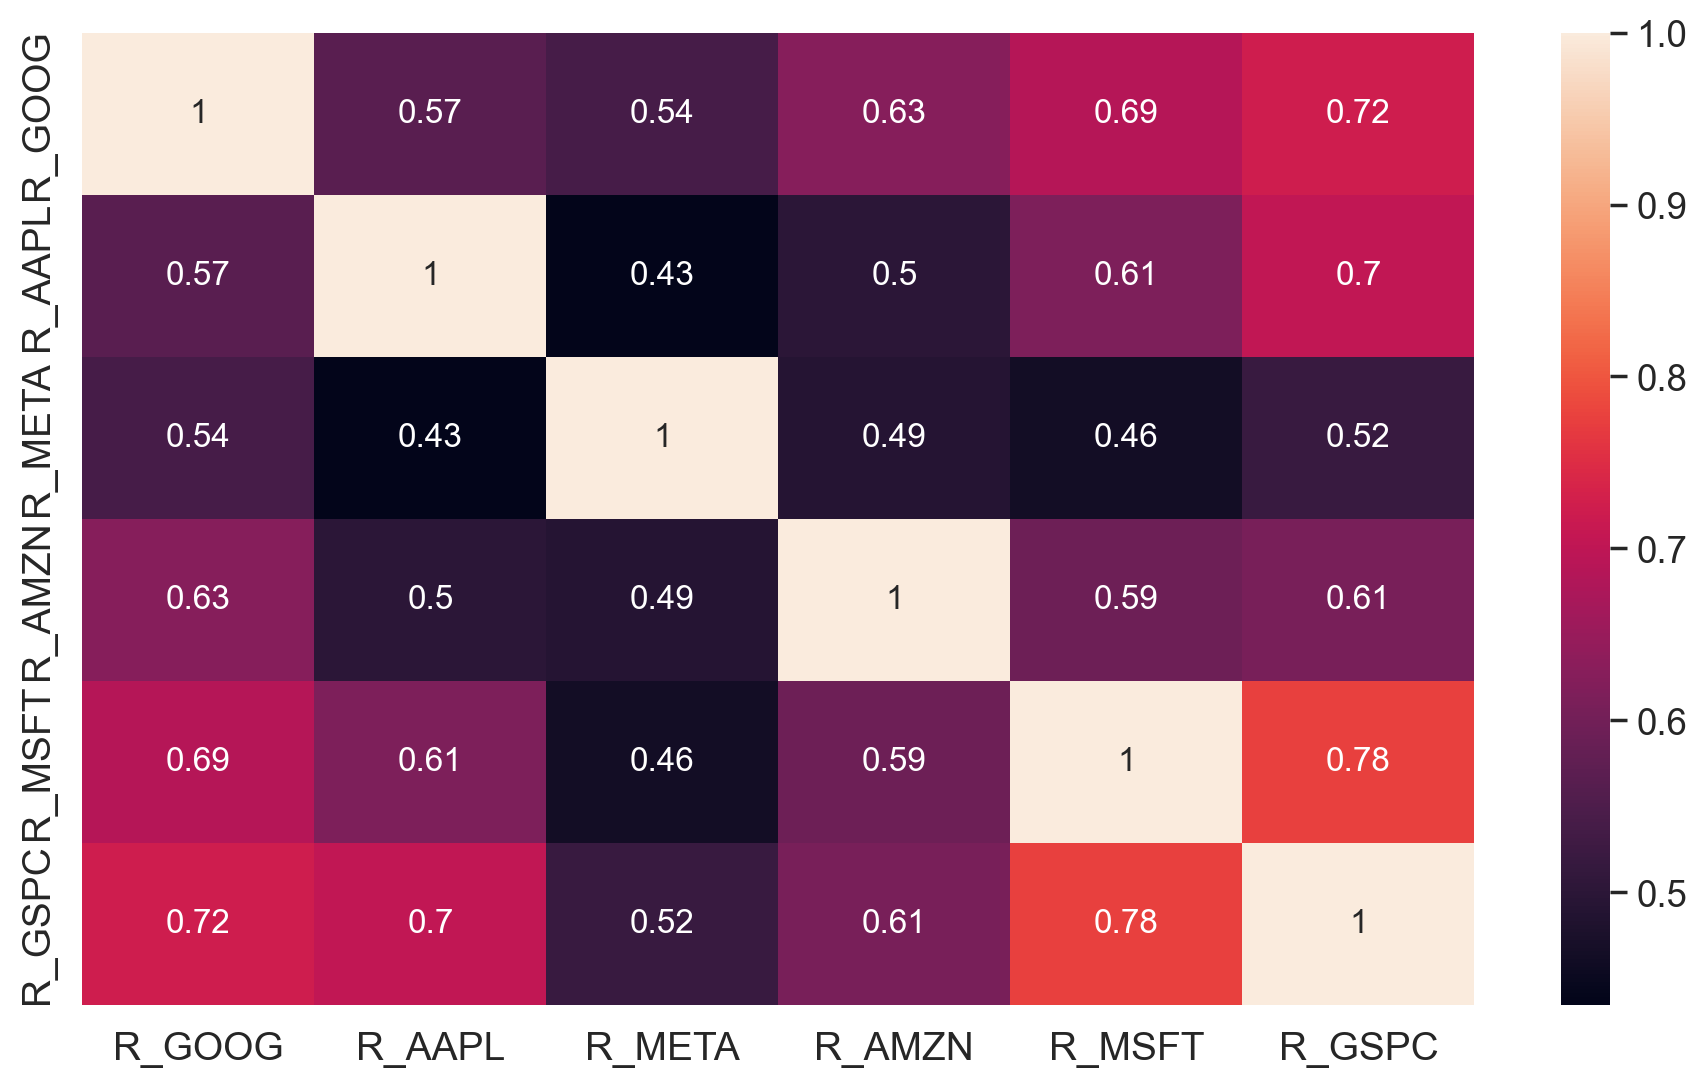

In [ ]:
corr = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

In [ ]:
returns = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 252
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the stock of R_GOOG = 26.82 % per year
The volatility of the stock of R_AAPL = 29.05 % per year
The volatility of the stock of R_META = 40.12 % per year
The volatility of the stock of R_AMZN = 32.28 % per year
The volatility of the stock of R_MSFT = 26.73 % per year
The volatility of the stock of R_GSPC = 17.39 % per year


In [ ]:
returns = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 21
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the stock of R_GOOG = 7.74 % per month
The volatility of the stock of R_AAPL = 8.39 % per month
The volatility of the stock of R_META = 11.58 % per month
The volatility of the stock of R_AMZN = 9.32 % per month
The volatility of the stock of R_MSFT = 7.72 % per month
The volatility of the stock of R_GSPC = 5.02 % per month


In [ ]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf ) / volatility
    return sharpe

In [ ]:
# Let's consider a risk-free investment with an annual return of 2.5% and
#we calculate the Sharpe Ratio of each stock
for col in returns.columns:
    print("The Sharpe ratio of,", col,"=", round(sharpe_ratio(returns[col]),2 ))

The Sharpe ratio of, R_GOOG = 0.67
The Sharpe ratio of, R_AAPL = 0.74
The Sharpe ratio of, R_META = 0.41
The Sharpe ratio of, R_AMZN = 0.69
The Sharpe ratio of, R_MSFT = 0.86
The Sharpe ratio of, R_GSPC = 0.53


In [ ]:
cov = returns.cov() * 12 # annualized
cov

,R_GOOG,R_AAPL,R_META,R_AMZN,R_MSFT,R_GSPC
R_GOOG,0.003426,0.002098,0.002770,0.002577,0.002346,0.001607
R_AAPL,0.002098,0.004020,0.002412,0.002236,0.002273,0.001689
R_META,0.002770,0.002412,0.007665,0.003033,0.002359,0.001728
R_AMZN,0.002577,0.002236,0.003033,0.004962,0.002431,0.001623
R_MSFT,0.002346,0.002273,0.002359,0.002431,0.003402,0.001719
R_GSPC,0.001607,0.001689,0.001728,0.001623,0.001719,0.001440


In [ ]:
beta_GOOG = cov.iloc[0,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Google is : {beta_GOOG}')

Beta (10Y period) of Google is : 1.1160958558286476


In [ ]:
beta_AAPL = cov.iloc[1,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Apple is : {beta_AAPL}')

Beta (10Y period) of Apple is : 1.1729651110801813


In [ ]:
beta_META = cov.iloc[2,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Facebook is : {beta_META}')

Beta (10Y period) of Facebook is : 1.2000175713268197


In [ ]:
beta_AMZN = cov.iloc[3,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Amazon is : {beta_AMZN}')

Beta (10Y period) of Amazon is : 1.127099926299393


In [ ]:
beta_MSFT = cov.iloc[4,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Microsoft is : {beta_MSFT}')

Beta (10Y period) of Microsoft is : 1.1938834203824897


In [ ]:
beta_GSPC = cov.iloc[5,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of S&P 500 is : {beta_GSPC}')

Beta (10Y period) of S&P 500 is : 1.0


In [ ]:
from scipy.optimize import minimize

In [ ]:
# Portfolio Simulation
portfolio = 2673 # generation of a portfolio
n_assets = returns.shape[1]
weights = np.random.dirichlet(np.full(n_assets,0.05),portfolio)
mean_returns = returns.mean()
sigma = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol = np.zeros(portfolio)
sharpe_ratio = np.zeros(portfolio)
rf_rate = 0.0 # risk free rate
for i in range(portfolio):
    w = weights[i,:]
    expected_returns[i] = np.sum(mean_returns @ w)*252
    expected_vol[i] = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
    sharpe_ratio[i] = (expected_returns[i]-rf_rate)/expected_vol[i]

In [ ]:
def portfolio_volatility(weight):
    return np.sqrt(np.dot(weight.T,
                        np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):
    return np.sum(mean_returns*weight)*252

def portfolio_performance(weight):
    return_p = portfolio_return(weight)
    vol_p = portfolio_volatility(weight)
    return return_p, vol_p

In [ ]:
def negativeSR(weight):
    return_p, vol_p = portfolio_performance(weight)
    rf_rate = 0.025
    return -(return_p - rf_rate)/vol_p

def max_sharpe_ratio():

    def sum_one(weight):
        w= weight
        return np.sum(weight)-1
    n_assets = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': sum_one})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist() # w0 is an initila guess

    return minimize(negativeSR,w0,method='SLSQP',
        bounds =((0,1),)*n_assets,
        constraints = weight_constraints)

In [ ]:
def min_vol():
    n_assets = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds = ((0,1),)*n_assets
    return minimize(portfolio_volatility,w0,method='SLSQP',
        bounds = bounds,
        constraints = weight_constraints)

In [ ]:
def efficient_portfolio_target(target):
    constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)- target},
    {'type' :'eq','fun': lambda x: np.sum(x)-1})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds = ((0,1),)*n_assets
    return minimize(portfolio_volatility,w0, method = 'SLSQP',
        bounds = bounds,
        constraints = constraints)

In [ ]:
def efficient_frontier(return_range):
    return [efficient_portfolio_target(ret) for ret in return_range]

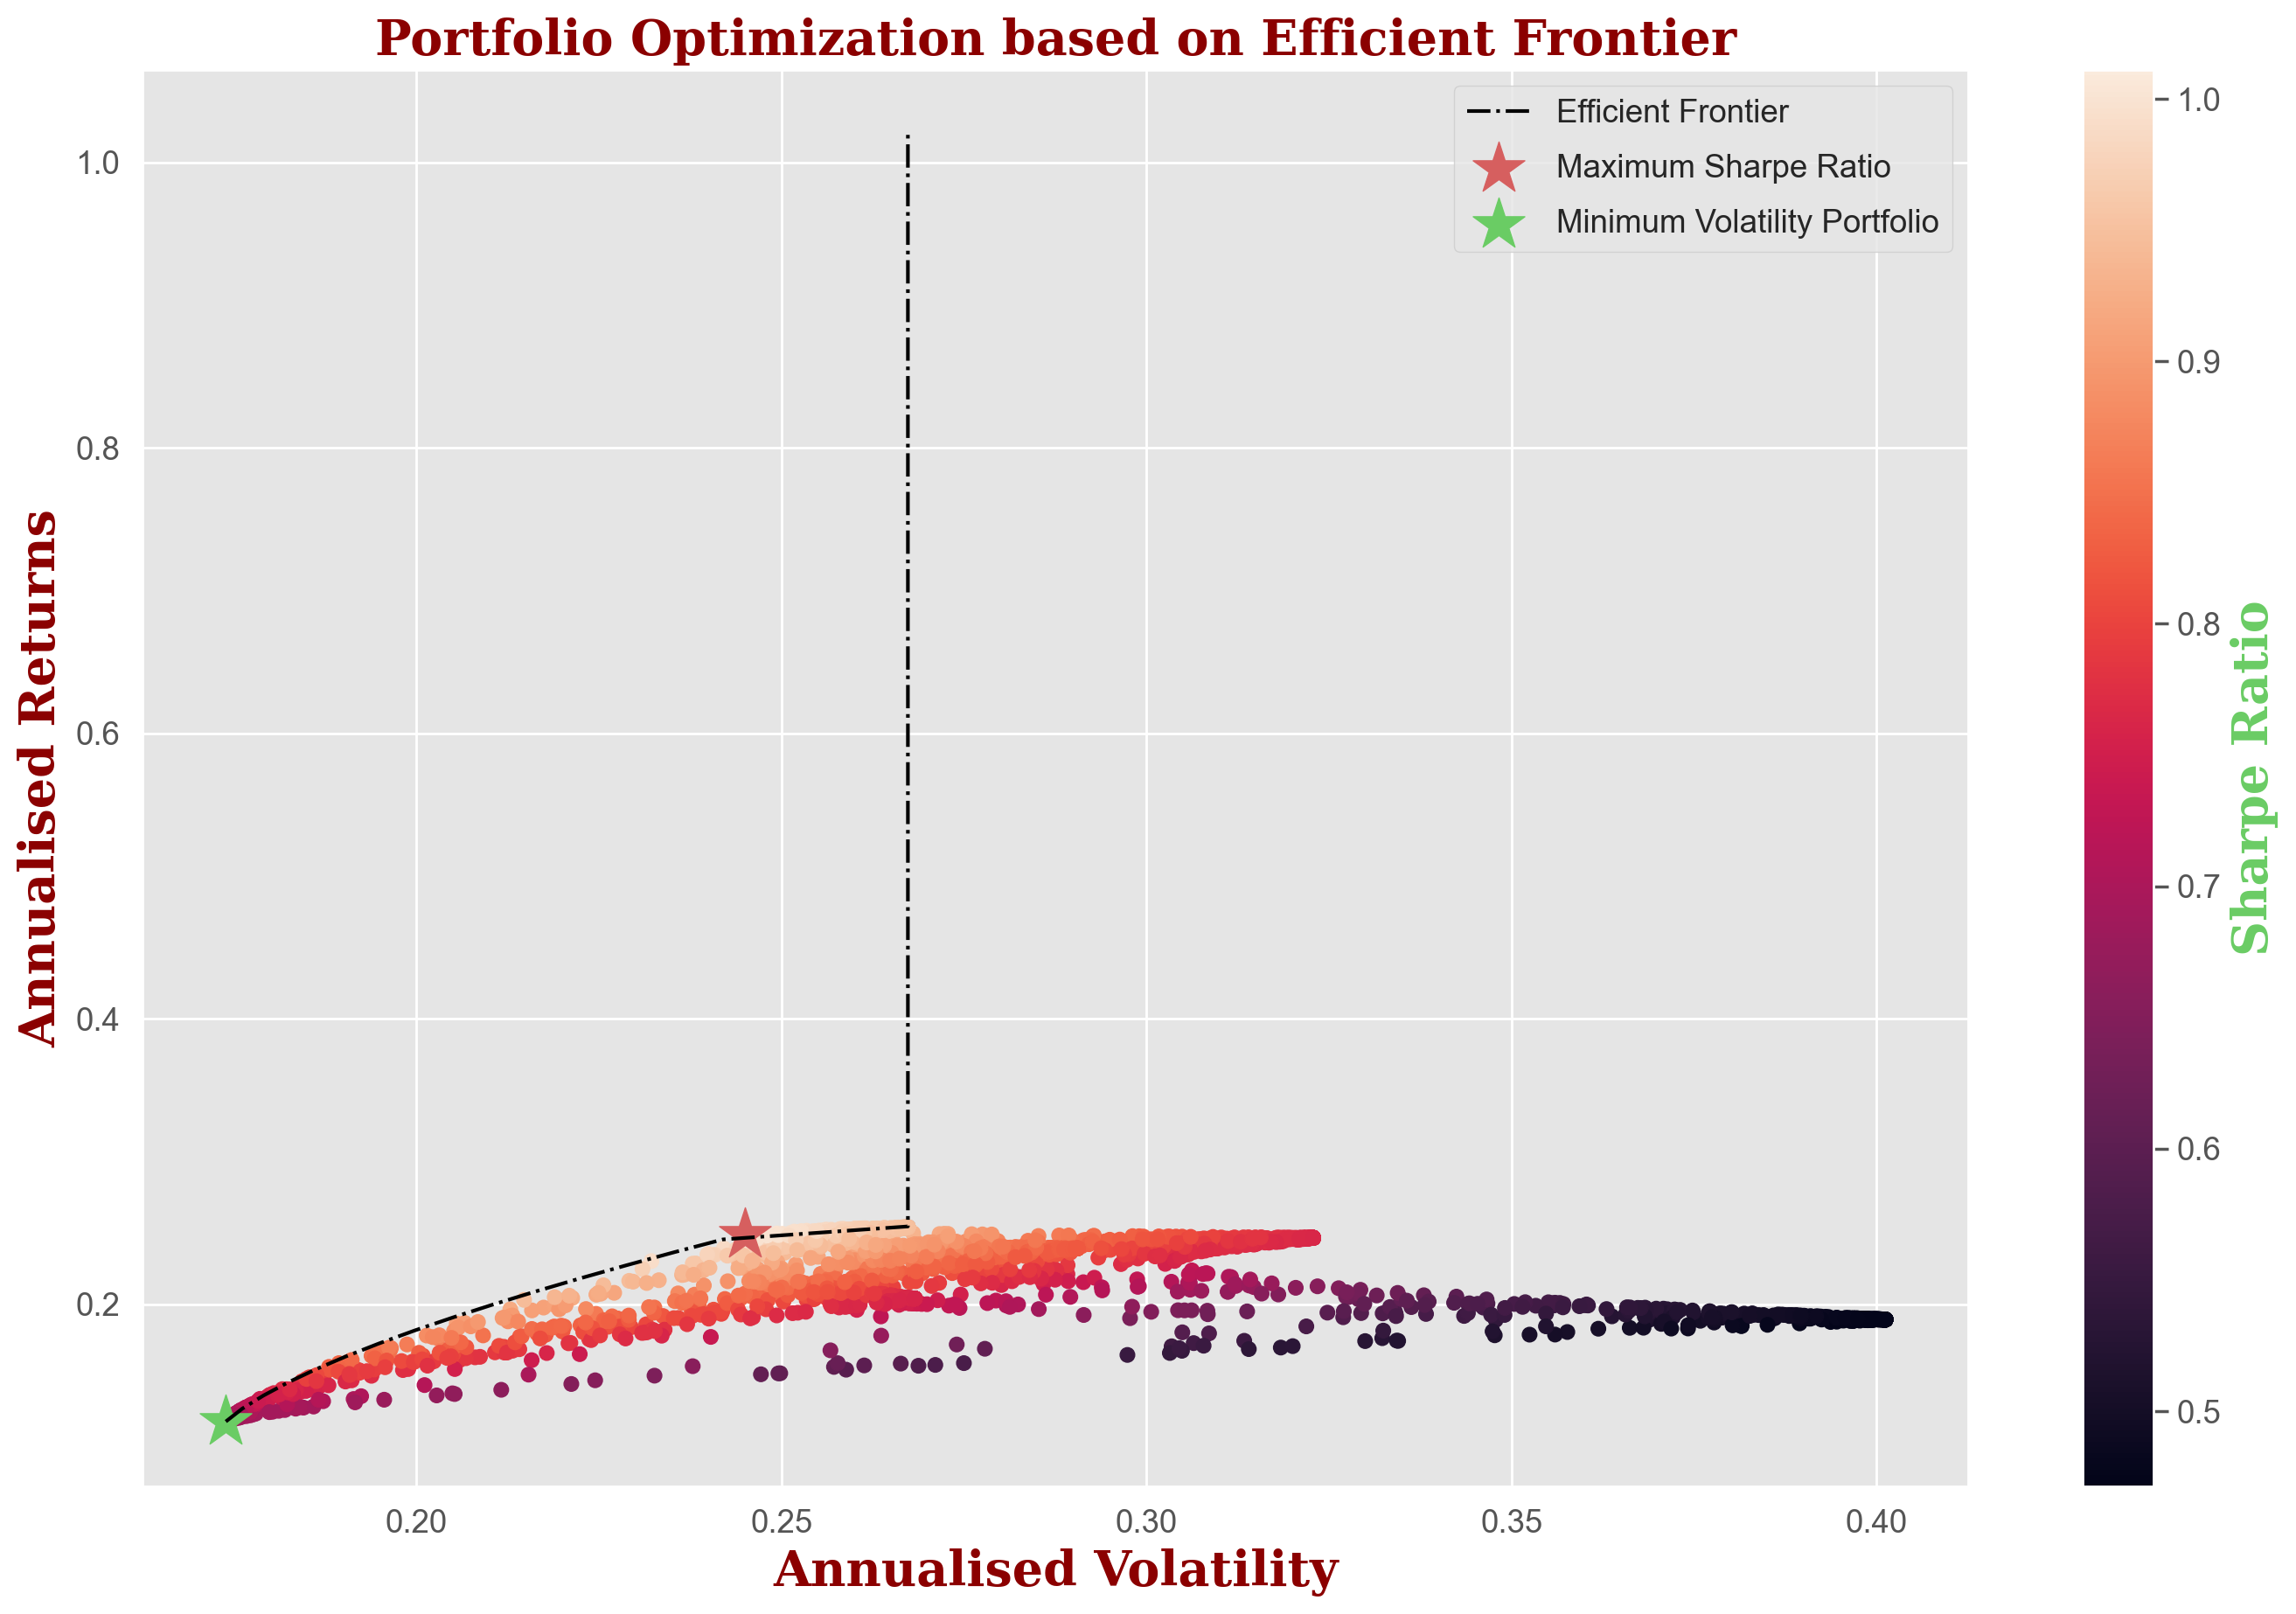

In [ ]:
sharpe_maximum = max_sharpe_ratio()
return_p,vol_p = portfolio_performance(sharpe_maximum['x'])
min_volatility = min_vol()
return_min,vol_min = portfolio_performance(min_volatility['x'])

plt.figure(figsize =(15,10))
plt.style.use('ggplot')
plt.scatter(expected_vol,expected_returns, c = sharpe_ratio)
# plt.colorbar.sel(label = 'Sharpe Ratio',size=20)
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle ='dashdot', color ='black',
label='Efficient Frontier')
plt.scatter(vol_p,return_p, c = 'r', marker='*', s = 500, label = 'Maximum Sharpe Ratio')
plt.scatter(vol_min,return_min, c = 'g', marker ='*', s = 500, label='Minimum Volatility Portfolio')

font1 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
font2 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
plt.title('Portfolio Optimization based on Efficient Frontier',fontdict=font1)
plt.xlabel('Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
plt.legend(labelspacing=0.8)